**Estudiante 1:** 
<br>
**Estudiante 2:** 

# IMEC2001 Herramientas Computacionales 
## Taller 1: Interpolación – Raíces
### Fecha Entrega Sobre 5.00: <font color="#FF5733"> 23:59h de Abril 30, 2023</font>
### Fecha Entrega Sobre 4.00: <font color="#FF5733"> 23:59h de Mayo 2, 2023</font>

Universidad de los Andes — Abril 19, 2023.
___

## Tener en Cuenta

- En la casilla anterior a esta coloque el nombre de los integrantes del grupo.
- La entrega del taller es por Bloque Neon y se envía el archivo en formato de Jupyter Notebook (extensión `.ipynb`).
- El nombre del archivo debe ser: `T3_Apellido Integrante 1_ Apellido Integrante 2` (si trabajó el parejas). `T3_Apellido` (si trabajó individual). Por ejemplo: `T3_SalazarPeña_VargasTorres` o `T3_VargasTorres`
- Comente el código con el proceso que realizó para llegar a la solución.
- A lo largo del taller se dejarán algunas casillas comentadas donde puede desarrollar el código, sin embargo, no es obligatorio que lo utilice en ese orden.

<div class='alert alert-block alert-danger'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Para poder realizar un segundo envío con correcciones, la nota del **primer envío** debe estar mínimo en **Aprendiz**.
</div>

---

## TABLA DE CONTENIDO

### Sección 1: Interpolación – Curva de una Bomba [→](#section1)
- 1.1. Polinomio Interpolador de Lagrange y Fenómeno de Runge
- 1.2. Interpolaciones con la Librería `scipy.interpolate`
- 1.3. Importar Librerías
- 1.4. Polinomio Interpolador de Lagrange
- <font color="#276C9B"> Ejercicio 1: Interpolación Curva Bombas </font> [→](#exercise1)

### Sección 2: Raíces – Solución de Ecuaciones No Lineales [→](#section2)
- 2.1. Método de Bisección
- 2.2. Encontrar Raíces con la Librería `scipy.optimize.root_scalar`
- 2.3. Importar Librerías
- 2.4. Método de Newton
- 2.5. Raíces de Dos Ecuaciones y Dos Variables
- <font color="#276C9B"> Ejercicio 2: Raíces </font> [→](#exercise2)

---

<a id="section1"></a>
# Sección 1: Interpolación – Curva de una Bomba

En algunos problemas de ingeniería, se requiere **extraer diferentes datos que no están expresados con una función explícita**.

En este caso, para resolver diversos problemas de flujo interno (por ejemplo, tuberías) se requiere hacer un ajuste de curva o bien una interpolación para conocer los puntos intermedios. En este módulo se explorarán las herramientas de interpolación de la librería ``SciPy``.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería dando [clic aquí](https://docs.scipy.org/doc/scipy/reference/interpolate.html).
</div>

<br>

El ejemplo de este taller se basa en las curvas de desempeño de las bombas, en donde la cabeza del sistema de bombeo depende del caudal al que esté operando la bomba en ciertas velocidades angulares específicas. A continuación se puede ver un ejemplo del libro de Mecánica de Fluidos de White (disponible en **Bloque Neón > Contenido > Semana 3 > Lecturas**):

<img src="./img/bomba.png" width="500" height="600">

Las líneas color rosa hacen referencia a la relación de cabeza y caudal; las líneas negras a eficiencia de la bomba a determinadas condiciones; y la línea gruesa (NPSH) es la cabeza mínima del sistema para un funcionamiento adecuado sin **cavitación**.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Se sugiere ver el video explicativo de las curvas de las bombas dando [clic aquí](https://www.youtube.com/watch?v=wz20Ug5t5c0).
</div>

<br>

---

<div class="alert alert-block alert-success">
    
El propósito de este taller es poder realizar una interpolación de las diferentes gráficas y visualizarlas utilizando las herramientas vistas en clase, para así poder tener una idea de cómo funcionan las diferentes técnicas de interpolación. En este caso utilizaremos el método de lagrange y los splines o trazadores.
</div>

<br>

## 1.1. Polinomio Interpolador de Lagrange y Fenómeno de Runge

Una de las técnicas más populares para pequeñas bases de datos es el polinomio interpolador de Lagrange, que toma $n$ puntos en ambos ejes y aproxima un polinomio de grado $n-1$ que hace un ajuste a la curva.

Por ejemplo, si se toman 3 puntos, se aproxima a una parábola. Es importante tener en cuenta que si se toman muchos puntos, por ejemplo 5 o 6, el método puede presentar grandes errores, algo conocido como el fenómeno de Runge. A continuación se podrá entender cómo funciona este método y cómo evitar los diferentes errores. 

Una expresión matemática que nos ayuda a entender el comportamiento de un interpolador de Lagrange es la siguiente, dada una cantidad de puntos $k+1$ aproximada a una función $L(x)$:

$$ L(x) = \sum\limits_{j = 0}^ k y_j \times \prod_{m \neq j}^{k} \frac{x-x_m}{x_j - x_m}$$

El error de Runge que se tiene está descrito como 
$$R_n=f[x,x_n,x_{n-1},...,x_0]\prod_{i=0}^n(x-x_i)$$

In [1]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def formato_grafica(ax, fig, titulo= "", x_label= "", y_label= "", xl_i = None, xl_u = None, yl_i = None, yl_u = None):
    ax.set_title(titulo)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
#     ax.set_xticklabels(ax.get_xticks(), rotation = 0)
#     ax.set_yticklabels(ax.get_yticks(), rotation = 0)
    ax.set_xlim(xl_i, xl_u)
    ax.set_ylim(yl_i, yl_u)
    ax.legend(loc='best', fontsize= 7)
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    fig.tight_layout()

A continuación se muestra la implementación del método de Lagrange:

$$
L(x) = \sum\limits_{j = 0}^ k y_j \times \prod_{m \neq j}^{k} \frac{x-x_m}{x_j - x_m}
$$

In [3]:
def productoria(X_arreglo: np.array, i: np.array, x_init: np.array)-> np.array:
    """
    Función que calcula la productoria

    Parameters
    ----------
    X_arreglo : np.array
        Array con los valores originales 
    i : np.array
        Identificador del i de la función productoria [#! Recuerde que i != j] 
    x_init : np.array
        Array con los valores de los que se quiere encontrar la interpolación

    Returns
    -------
    valor : np.array
        Valores para cada punto. 

    """
    n = len(X_arreglo) # Todos los datos que conocemos
    valor = 1 # Valor original para la multiplicación
    for j in range(n):
        if j != i: # Comprobación de que el i sea diferente al j en las posiciones
            valor *= (x_init - X_arreglo[j])/(X_arreglo[i] - X_arreglo[j]) # Productoria
    return valor

def interp_lagrange(X: np.array, Y: np.array, x_inter: np.array) -> np.array:
    """
    Función que implementa la interpolación de Lagrange

    Parameters
    ----------
    X : np.array
        Array de los valores originales en x
    Y : np.array
        Array de los valores originales en y
    x_inter : np.array
        Array con los valores de los que se quiere encontrar la interpolación

    Returns
    -------
    valor : np.array
        Array con los puntos interpolados 

    """
    valor = 0 # Valor inicial para empezar a sumar
    for i in range(len(X)):
        valor += productoria(X, i, x_inter) * Y[i]    
    return valor

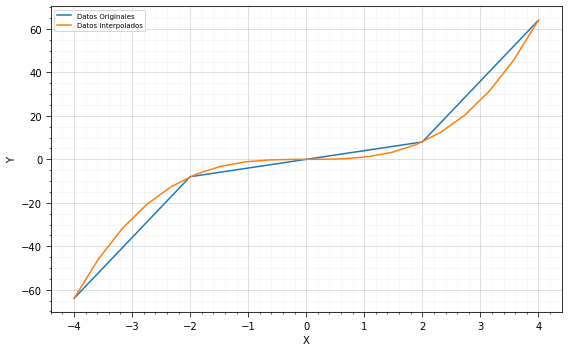

In [4]:
# Ejemplo datos a interpolar utilizando las funciones anteriormente implementadas

# Puntos originales
x_int = np.linspace(-4, 4, 5) # 3 puntos, entonces se toma un polinomio de orden 2
y_int = x_int**3

# Datos a interpolar
x_inter = np.linspace(-4, 4, 20)
y_res = interp_lagrange(x_int,y_int, x_inter)

# Gráfica 
hor = 8
ver = 5
fig, ax = plt.subplots(figsize=(hor, ver))

ax.plot(x_int, y_int, label = "Datos Originales")
ax.plot(x_inter, y_res, label = "Datos Interpolados")
formato_grafica(ax, fig, x_label="X", y_label="Y")

El polinomio interpolador de Lagrange funciona perfectamente para una parábola.

<br>

Ahora se puede analizar qué pasa si se se tiene una función más compleja.

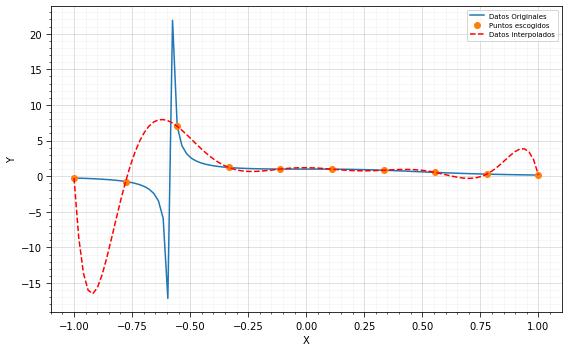

In [5]:
def f(x): return 1/(1+5*x**3)

x_exp = np.linspace(-1,1,100)
y_exp = f(x_exp)

# Puntos a interpolar mal
x_intmal = np.linspace(-1,1,10)
y_intmal = f(x_intmal)
y_resmal = interp_lagrange(x_intmal,y_intmal,x_exp)

# Gráfica 
hor = 8
ver = 5
fig, ax = plt.subplots(figsize=(hor, ver))

ax.plot(x_exp, y_exp, label = "Datos Originales")
ax.plot(x_intmal, y_intmal, 'o', label = "Puntos escogidos")
ax.plot(x_exp, y_resmal, 'r--', label = "Datos interpolados")
formato_grafica(ax, fig, x_label="X", y_label="Y")

Lo anterior evidencia el error de Runge que se comentó anteriormente. No siempre es conveniente usar un interpolador de Lagrange para funciones complejas, más aun cuando se requiere utilizar otros métodos computacionales.

## 1.2. Interpolaciones con la Librería `scipy.interpolate`

Ya que se conoce la lógica detrás del método numérico para uno de los métodos más comunes de interpolación, se pasa a utilizar una de las librerías que se encuentra en Python, esto permite no solamente realizar las operaciones de manera rápida sino eficiente ya que no siempre se tiene el tiempo para implementar el método numérico. 

1. Interpolación polinómica [[``.interp1d``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)] 
3. Interpolación Lagrange   [[``.lagrange``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange)]
4. Interpolación Splines    [[``.splev``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev)] [[``.splev``]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep) 

## 1.3. Importar Librerías

Para importar la librería se utiliza la siguiente línea de código:

```python
from scipy import interpolate as inter
```

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En este caso el alias es `inter`, pero lo puede cambiar por uno diferente sin que sea `int`, ya que este es un tipo de dato reservado de Python.
</div>

In [6]:
from scipy import interpolate as inter 

def graficas(x_exp: np.array, y_exp: np.array, x_intmal: np.array, y_intmal: np.array, x_res, y_res, ax) -> None:
    """
    Realiza la gráfica con los datos experimentales (dados inicialmente), los interpolados

    Parameters
    ----------
    x_exp : np.array
        Datos en x del comportamiento de la función real.
    y_exp : np.array
        Datos en y del comportamiento de la función real.
    x_intmal : np.array
        Datos en x iniciales o conocidos.
    y_intmal : np.array
        Datos en y iniciales o conocidos.
    x_res : np.array
        Datos en x iniciales o conocidos.
    y_res : np.array
        Resultado de la interpolación
    ax : axis
        Eje en donde se colocan las gráficas.
        
    Returns
    -------
    Retorna la gráfica de la interpolación 
    
    """
    
    hor = 8
    ver = 5

    plt.figure(figsize=(hor, ver))

    ax.plot(x_exp, y_exp, label = "Datos Originales")
    ax.plot(x_intmal, y_intmal, 'o', label = "Puntos escogidos")
    ax.plot(x_res, y_res, 'r--', label = "Datos interpolados")
    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    ax.legend(loc='best', fontsize=11)

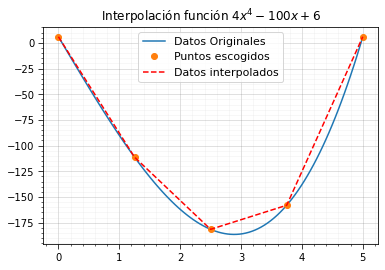

<Figure size 576x360 with 0 Axes>

In [7]:
def f(x): return (4*x**3-100*x+6)

# Función real
x_real = np.linspace(0, 5, 100) 
y_real = f(x_real)

# Datos para interpolar
x_int = np.linspace(0, 5, 5)
y_int = f(x_int)

# Bono 1
# ¿Los límites de una interpolación (en general) cuáles son?
# El dato inicial y final, si se sale de estos se está realizando una extrapolación
"""
Pasos:
1. Se asigna a una variable la función inter.interp1d con los datos 
   en x y en y que se quieren interpolar.
2. Se llama la función con los x de los que se quiere saber su valor
"""
interp_lineal = inter.interp1d(x_int, y_int, kind='linear') 
y_fun_int = interp_lineal(x_int)

fig, ax = plt.subplots()

graficas(x_real, y_real, x_int, y_int, x_int, y_fun_int, ax)
ax.set_title(r'Interpolación función $4x^4-100x+6$')
plt.show()

Los datos interpolados no se ven tan bien como la curva original (curva color azul), esto se debe a que se está utilizando una interpolación lineal (los puntos se unen con lineas).  

<div class="alert alert-block alert-warning">

**Bono 2**

1. Identifique el mínimo número de puntos que hacen que la interpolación anterior (curva color roja) se vea como la curva original (curva color azul).
</div>
RTA: 12

Text(0, 0.5, '$f(x)$')

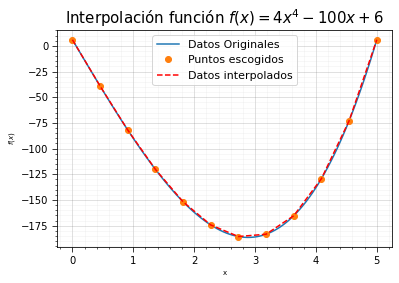

<Figure size 576x360 with 0 Axes>

In [8]:
# Función real
x_real = np.linspace(0, 5, 100) 
y_real = f(x_real)

# Datos para interpolar
min_num = 12
x_int = np.linspace(0, 5, min_num) # Se cambia el número de puntos que se consideran
y_int = f(x_int)

"""
Pasos:
1. Se asigna a una variable la función inter.interp1d con los datos 
   en x y en y que se quieren interpolar.
2. Se llama la función con los x de los que se quiere saber su valor
"""

interp_lineal = inter.interp1d(x_int, y_int, kind='linear') 
y_fun_int = interp_lineal(x_int)

fig, ax = plt.subplots()

graficas(x_real, y_real, x_int, y_int, x_int, y_fun_int, ax)
ax.set_title('Interpolación función $f(x) = 4x^4-100x+6$', fontsize=15)
ax.set_xlabel('x', fontsize=7)
ax.set_ylabel('$f(x)$', fontsize=7)

Con las dos gráficas anteriores se evidencia que se tiene un mejor ajuste cuando se cuenta con más puntos. Una de las referencias donde pueden encontrar más información sobre la interpolación con polinomios es el libro <font color="blue">Métodos Numéticos para ingenieros de Steven C. Chapla y Raymon P. Canale</font>.

## 1.4. Polinomio Interpolador de Lagrange

Ya implementado el método numérico, se mira en la librería `SciPy` si existe una función que nos permita realizar el procedimiento, para esto utilizaremos el método [`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange).

<br>

Este método realiza el mismo procedimiento, como parámetros se tiene las coordenadas de $x$ y de $y$, este retorna explicitamente el polinomio de Lagrange, por lo cual se utilizará de la librería numpy [`numpy.polynomial.polynomial`](https://numpy.org/doc/stable/reference/routines.polynomials.html) la cual toma los coeficientes del resultado de la función anterior y después para cada uno de los puntos opera, encontrando su respectivo valor de $y$.

<br>

A continuación se muestra un ejemplo de cómo se puede implementar:

Text(0.5, 1.0, 'Interpolación función $4x^4-100x+6$')

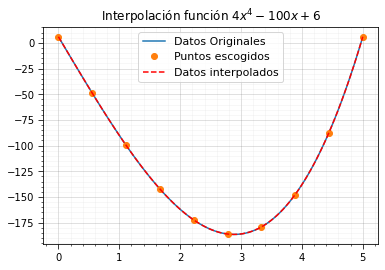

<Figure size 576x360 with 0 Axes>

In [9]:
from numpy.polynomial.polynomial import Polynomial

def f(x):
    return 4*x**3 -100*x + 6

x_int = np.linspace(0, 5, 10) 
y_int = f(x_int)
lag_poly = inter.lagrange(x_int, y_int)

polim = Polynomial(lag_poly.coef[::-1])

x_nuevo = np.linspace(0, 5, 100)
y_nuevo = polim(x_nuevo)

fig, ax = plt.subplots()

graficas(x_real, y_real, x_int, y_int, x_nuevo, y_nuevo, ax)

ax.set_title(r'Interpolación función $4x^4-100x+6$')

<a id="exercise1"></a>
# <font color="#276C9B"> Ejercicio 1: Interpolación Curva Bombas </font>

## <font color="#276C9B"> Punto 1 </font>

<img src="./img/bomba.png" width="500" height="600">

A partir de las curvas características de una bomba (curvas color rosado que relacionan cabeza y caudal), realice los siguientes pasos:

<div class="alert alert-block alert-warning">
    
**1.** Cree dos funciones en donde en cada una utilice una de las librerías vistas en clase o las que se encuentran en el enunciado del taller (`interp1d`, `splev`, `Polynomial`, etc). Cada función debe ser un interpolador diferente.
</div>

A continuación se encuentra un ejemplo del formato que se debe utilizar junto con dos ejemplos de las posibles librerías que se pueden utilizar:

``` Python
def fun_1(param_1: tipo, param_2: tipo, ....)-> tipo que se retorna:
    """
    Descripción de la función

    Parameters
    ----------
    param_1 : tipo
        Descripción del parámetro
    param_2 : tipo
        Descripción del parámetro

    Returns
    -------
    variable : tipo
        Descripción de la variable 
    """
    Variables y operaciones con el método polynomial
```

``` Python
def fun_2(param_1: tipo, param_2: tipo, ....)-> tipo que se retorna:
    """
    Descripción de la función 

    Parameters
    ----------
    param_1 : tipo
        Descripción del parámetro
    param_2 : tipo
        Descripción del parámetro

    Returns
    -------
    variable : tipo
        Descripción de la variable 
    """
    Variables y operaciones con el método interp1d
```

In [10]:
# Importar librerías 

In [11]:
# ================= Creación funciones ================= #


## <font color="#276C9B"> Punto 2 </font>
<div class="alert alert-block alert-warning">
    
**2.** Escoja dos curvas características de la bomba (una debe ser la de $\emptyset$ 41) y tome para cada una 4 puntos como mínimo.
</div>

## <font color="#276C9B"> Punto 3 </font>
<div class="alert alert-block alert-warning">
    

**3.** Con las funciones realizadas anteriormente interpole los datos, por cada curva utilice una función diferente.
</div>

Por ejemplo: `fun_1` $\rightarrow$ datos de $\emptyset$ 35, y `fun_2` $\rightarrow$ datos de $\emptyset$ 38.

In [12]:
# Puntos Curvas


## <font color="#276C9B"> Punto 4 </font>

<div class="alert alert-block alert-warning">
    
**4.** Presente un `pandas.DataFrame` con los datos interpolados para cada curva.
</div>

In [13]:
# Datos interpolados


## <font color="#276C9B"> Punto 5 </font>

<div class="alert alert-block alert-warning">
    
**5.** Realice los pasos anteriores para **una** de las curvas de BHP (puede tomar las siguientes: 1000 o 1250 bhp). Solo utilice una de las funciones realizadas.
</div>

In [17]:
# Puntos Curva

## <font color="#276C9B"> Punto 6 </font>

<div class="alert alert-block alert-warning">
    
**6.** Realice una gráfica con la interpolación de ambas curvas. En la misma figura deben graficarse los puntos que escogió.
</div>

In [1]:
# --------------- Gráficas --------------- #

---
<a id="section2"></a>
# Sección 2: Raíces – Solución de Ecuaciones No Lineales

En problemas de ingeniería, es importante conocer las diferentes herramientas que permiten solucionar ecuaciones que en el papel pueden ser complejas o incluso imposibles de solucionar. 

En algunos casos las ecuaciones que se manejan no son lineales (es decir, tienen exponentes, raices, funciones trigonométricas). Un ejemplo de lo anterior es un polinomio.

$$
f(x) = ax^2 + bx + c
$$


Para solucionarla por lo general se utiliza la ecuación cuadrática.

$$
x = \frac{-b+-\sqrt{b^2-4ac}}{2a}
$$

En esta se buscan las <b>raíces</b> de la ecuación, es decir, **qué valores de $x$ hacen que la ecuación sea igual a 0**. Para el caso anterior, es posible calcular su valor con un lápiz y un papel, pero para ecuaciones como $ \sin^2{(x - 3)} = \cos{(2x)}$ la solución se vuelve poco trivial. 

Algunos de los métodos que se utilizan para solucionar este problema son:
1. **Método gráfico.**
2. **Métodos Cerrados:** Se seleccionan límites en donde se sabe que se encuentra la raíz, siempre obtiene la raíz. 
    - Bisección
    - Falsa posición


3. **Métodos Abiertos:** Pueden requerir más valores para la búsqueda, y el intervalo elegido no necesariamente contiene la raíz, por lo cual no siempre convergen.  
    - Iteración simple
    - Newton-Raphson
    - Secante

## 2.1. Método de Bisección

Este método necesita dos parámetros $x_l$ y $x_u$ siendo estos los límites inferior y superior respectivamente. Como se mencionó anteriormente se necesita saber el intervalo en donde se encuentra la solución. El algoritmo de solución es el siguiente: 

1. Se seleccionan los límites [$x_l$ y $x_u$]
2. Se calcula un valor promedio entre los dos intervalos 

$$
x_r = \frac{x_u + x_l}{2}
$$


3. Se determina un nuevo intervalo de busqueda. Este paso depende de $x_r$, $x_u$ y $x_l$, ya que se mira el <b>signo</b> de cada una de estas variables. Como se muestra en la siguiente figura, lo que se quiere es acercarse al eje x para así encontrar la raíz.
<figure>
<img src='./img/ejemplificacion_biseccion.jpg' width="400" height="500">
<figcaption><center> <k>Ramírez R, F. (2022). 4. Raíces de ecuaciones. Modelación y Análisis Numérico ICYA 2001</k></center></figcaption>
</figure>

El error que se calcula entre las iteraciones está dado por:

$$\varepsilon_a = \frac{x_{i+1}-x_i}{x_{i+1}}$$

Dependiendo del resultado de la multiplicación entre $f(x_u)$ y $f(x_r)$ y $f(x_l)$ y $f(x_r)$ se seleccionan nuevos límites y se vuelve a repetir el proceso, esto con el fin de acercarse al punto de la raíz.

<div class="alert alert-block alert-warning">

**Bono 3**
    
Responda las siguientes preguntas:

**1.** ¿Qué pasa si se multiplica $f(x_u)$ y $f(x_r)$ para la imágen de la izquierda?

**2.** ¿Qué pasa si se multiplica $f(x_l)$ y $f(x_r)$ para la imágen de la derecha?
</div>

Respuestas:
1. Su producto es negativo por lo cual se identifica que cambia el intervalo de búsqueda
2. Su producto es negativo por lo cual se identifica que cambia el intervalo de búsqueda

In [22]:
# Implementación método de bisección 

import math

x_l = 0               # Límite inferior
x_u = 1               # Límite superior 
n = 100               # Número de iteraciones
tol = 10**-8          # Tolerancia 

def f(x: float) -> float:
    """
    Evaluación de x en la función

    Parameters
    ----------
    x : float
        Valor que se evalúa.

    Returns
    -------
    float
        Resultado de la operación

    """
    return math.sin(x-3)**2 - math.cos(2*x)

# Bono 4: ¿Qué hace el término de tolerancia y cómo se relaciona con el error?  
# RTA: Es el valor mínimo que uno está dispuesto a aceptar

def biseccion(x_l: float, x_u: float, n: float= 100, tol : float= 10**-8) -> float:
    """
    Función que implementa el método de bisección 
    
    Parameters
    ----------
    x_l : float
        Límite inferior.
    x_u : float
         Límite superior.
    n : float, optional
        Número de iteraciones. The default is 100.
    tol : float, optional
        Tolerancia. The default is 10**-8.

    Returns
    -------
    float
        Aproximación a la raíz de la ecuación.

    """
    if f(x_l)*f(x_u)<0:
        for i in range(n):
            x_r = (x_l + x_u)/2
            if f(x_l) * f(x_r) < 0:
                x_u = x_r
            else: 
                x_l = x_r
            xrp1 = (x_l + x_u) / 2
            error = abs((xrp1-x_r)/xrp1)
            if error<tol:
                break
        return x_r
    
"La solución es: " + format(biseccion(x_l, x_u, n, tol))

'La solución es: 0.5668366476893425'

Con la solución generada, ahora se mira el método gráfico, la herramienta utilizada para generar la gráfica fue [desmos](https://www.desmos.com/calculator?lang=es).

<img src='./img/Raiz_Desmos.jpg' width="400" height="500">

## 2.2. Encontrar Raíces con la Librería `scipy.optimize.root_scalar`

Ya conociendo la lógica de los métodos que encuentran las raíces dada una función, se pasa a utilizar las librerías que ofrece Python realizando así las operaciones de forma más rápida y en este variar entre métodos cambiando solo un parámetro denntro de las funcion. Para los efectos de este taller se utilizarán los siguientes [`métodos`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar):

- **Método de bisección (`bisect`)**. Los parámetros son: función, límites, método.
- **Método de Newton (`newton`)**. Losparámetros son: función, valor inicial, derivada de la función, método.
- **Método de Secante (`secant`)**.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería dando [clic aquí](https://docs.scipy.org/doc/scipy/reference/interpolate.html).
</div>


## 2.3. Importar Librerías

Para importar la librería se utiliza la siguiente línea de código:

```python
from scipy import optimize as opt
```

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En este caso el alias es `opt`, pero lo puede cambiar por uno diferente sin que sea `int`, ya que este es un tipo de dato reservado de Python.
</div>

In [23]:
from scipy import optimize as opt
from sympy import *

# ======================= Método bisección ======================= #

# Función f que se definió anteriormente
sol = opt.root_scalar(f, bracket=[0, 1], method = 'bisect')
sol

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 0.5668366475638322

In [24]:
# Para obtener datos espeficicos se utiliza lo siguiente

print("¿La solución convergió? {}".format(sol.converged))
print("Número de iteraciones: {}".format(sol.iterations))
print("Resultado raíz: {}".format(sol.root))

¿La solución convergió? True
Número de iteraciones: 39
Resultado raíz: 0.5668366475638322


## 2.4. Método de Newton

Este método toma la derivada de la función que se quiere evaluar y con esta se calcula el siguiente punto. 

$$
x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}
$$

Sin embargo, en casos como los siguientes el método no puede converger o llegar a una solución:
- Punto de inflexión cerca de la raíz.
- Cuando hay saltos hacia otra raíz.
- Cuándo la derivada es igual a 0.
- Cuando hay oscilaciones al rededor de un óptimo.

Para utilizarlo, se debe poder conocer su derivada y se recomienda graficarlo antes ya que no garantiza que se encuentre una raíz. Para su implementación se utilizará en el parámetro `method = 'newton'`.

In [25]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

# ======================= Método Newton ======================= #

# Se expresa como variables simbólicas (muy utilizado en Matlab)
x = Symbol('x') # Symbol de la librería sympy
f_n = 3*x**2 - x
diff_f = f_n.diff(x)
diff_f

6*x - 1

In [26]:
# Se pasa a un formato en donde se pueda operar x
f_n = lambdify(x, f_n)
diff_f = lambdify(x, diff_f)
diff_f

<function _lambdifygenerated(x)>

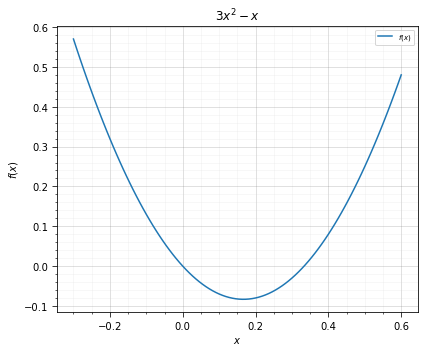

In [27]:
# Gráfica
hor = 6
ver = 5

fig, ax = plt.subplots(figsize=(hor, ver))

x = np.linspace(-0.3, 0.6, 100)
y = f_n(x)

ax.plot(x, y, label='$f(x)$')

formato_grafica(ax, fig, r'$3x^2-x$', '$x$', '$f(x)$')

La función $3x^2-x$ tienen dos raices (hay dos valores de $x$ en donde $f(x) = 0$.

El método de Newton necesita un valor inicial por parámetro tanto en su implementación desde 0 como con la librería, note que en el siguiente código este puede dar una raíz o la otra dependiendo del $x_0$ que se utilice.

In [28]:
sol_2 = opt.root_scalar(f, x0 = 0.4, fprime = diff_f,  method='newton')
sol_2

      converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 0.5668366464036539

In [29]:
sol_2 = opt.root_scalar(f, x0 = 0.1, fprime = diff_f,  method='newton')
sol_2

      converged: True
           flag: 'converged'
 function_calls: 62
     iterations: 31
           root: -0.6609495080166972

In [30]:
# Utilizando el f del ejemplo de bisección 

x = Symbol('x')
f = sin(x-3)**2 - cos(2*x)
diff_f = f.diff(x)

# Se pasa a un formato en donde se pueda operar x
f = lambdify(x, f)
diff_f = lambdify(x, diff_f)

sol_2 = opt.root_scalar(f, x0 = 0.6, fprime = diff_f,  method='newton')

# Resultados
print("¿La solución convergió? {}".format(sol_2.converged))
print("Número de iteraciones: {}".format(sol_2.iterations))
print("Resultado raíz: {}".format(sol_2.root))

¿La solución convergió? True
Número de iteraciones: 4
Resultado raíz: 0.5668366475637197


Note que el método de Newton tiene un menor número de iteraciones, esto se debe a que la ecuación que se utiliza parte de las series de Taylor. Puede leer más de esto en el libro <font color="blue">Métodos Numéticos para ingenieros de Steven C. Chapla y Raymon P. Canale</font>.

----

## 2.5. Raíces de Dos Ecuaciones y Dos Variables

Se quiere resolver el siguiente sistema de ecuaciones que tiene dos variables, tome $x = x_0$ y $y = x_1$, esto por la notación de la función de la librería. 

$$ (x_0 + 3) (x_1^3 - 7) = -18 $$

$$ \sin{(x_1 e^{x_0} - 1)} = 0 $$

La lógica detrás de lo anterior consiste en encontrar el punto de intersección entre las dos ecuaciones, para esto se igualan las ecuaciones a 0, después de lo anterior se introducen en la función ``fsolve``.

**Pasos:**
1. Importar la librería: ``from scipy.optimize import fsolve``.
2. Definir la función que se va a evaluar. <font color="red">¡OJO! se utiliza la notación de arriba `x = x[0]` y `y = x[1]` </font>. 
3. Llamar el método `fsolve`, entra por parámetro la función definida anteriormente y los valores iniciales $x$, y en el caso 2D como primeras aproximaciones.

Solución en x: 1.1335348765179664e-13
Solución en y: 0.9999999999991627


C:\Users\malej\AppData\Local\Temp\ipykernel_25552\3727360652.py:15: RuntimeWarning: invalid value encountered in power
  y_1 = (-18/(x + 3) + 7)**(1 / 3)


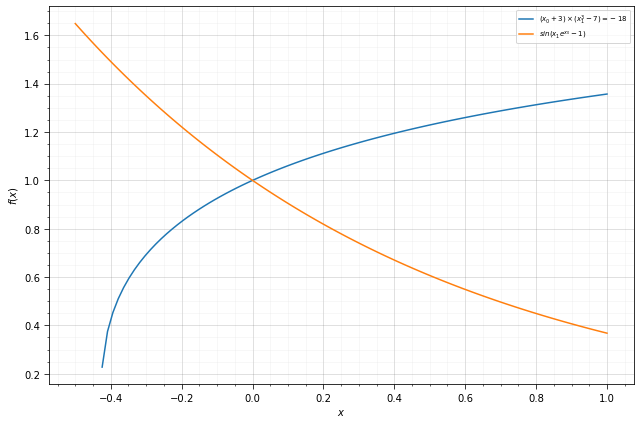

In [31]:
from scipy.optimize import fsolve

def f(x):
    return [(x[0] + 3) * (x[1]**3 - 7) + 18,
            math.sin(x[1] * math.exp(x[0])-1)]

root = fsolve(func=f,
              x0= [-0.5, 0.5])

# Resultados
print("Solución en x: {}".format(root[0]))
print("Solución en y: {}".format(root[1]))

x = np.linspace(-0.5, 1, 100)
y_1 = (-18/(x + 3) + 7)**(1 / 3)
y_2 = 1 / np.exp(x)

# Gráfica
hor = 9
ver = 6
fig, ax = plt.subplots(figsize=(hor, ver))

plt.plot(x, y_1, label = r'$(x_0 + 3)\times (x_1^3 - 7) = -18$')
plt.plot(x, y_2, label = r'$sin{(x_1 e^{x_0} - 1)}$')

formato_grafica(ax, fig, "", '$x$', '$f(x)$')


# Aparece un error es normal por los valores que está calculando. 

<div class="alert alert-block alert-warning">

**Bono 5**
    
**1.** ¿Cuál es la raíz cuando se tienen dos ecuaciones o dos gráficas? 

**2.** ¿Cuál cuando se tiene solo una ecuación?
</div>

1. El intercepto
2. El cruce de la gráfica con el eje x en 0

<a id="exercise2"></a>
# <font color="#276C9B"> Ejercicio 2: Raíces </font>

En la interpolación del [**Ejercicio 1**](#exercise1) se puede ver que se tiene un problema de raíces entre la curva característica (relación de cabeza y caudal), y la curva de potencia (bhp).

<div class="alert alert-block alert-warning">
    
A partir de los datos de la curva de $\emptyset$ 41 que obtuvo anteriormente,  encuentre las raíces existentes del siguiente conjunto de ecuaciones:

1. Ecuación que describe la curva característica de $\emptyset$ 41:

$$y = 325.2872 - 0.19295x - 0.02337x^2 -0.00408x^3$$

<br>

2. Ecuación que describe la curva correspondiente a **bhp = 1000**:

$$y = 423.719798- 12.13779x$$

<br>

3. Ecuación que describe la curva correspondiente a **bhp = 1250**:

$$y = 461.564997 - 11.65112x$$
 
    
**Nota**: No debe graficar, solo encontrar los valores de la raíz
</div>